## Quiz 

**1. True-False: Is Logistic regression a supervised machine learning algorithm?**

A. TRUE

B. FALSE

Solution: A

True, Logistic regression is a supervised learning algorithm because it has input variables (x) and an target variable (Y) when you train the model .

 

**2. True-False: Is Logistic regression mainly used for Regression?**

A. TRUE

B. FALSE

Solution: B

Logistic regression is a classification algorithm, don’t confuse with the name regression.


**3.Logistic regression assumes a:**

Answer choices

A. Linear relationship between continuous predictor variables and the outcome variable.

B. Linear relationship between continuous predictor variables and the logit of the outcome variable.

C. Linear relationship between continuous predictor variables.

D. Linear relationship between observations.

Answer: B. Linear relationship between continuous predictor variables and the logit of the outcome variable


**4. True-False: Is it possible to apply a logistic regression algorithm on a 3-class Classification problem?**

A. TRUE

B. FALSE

Solution: A

Yes, we can apply logistic regression on 3 classification problem, We can use One Vs all method for 3 class classification in logistic regression.


**5. Logistic regression is used when you want to:**


A. Predict a dichotomous variable from continuous or dichotomous variables.

B. Predict a continuous variable from dichotomous variables.

C. Predict any categorical variable from several other categorical variables.

D. Predict a continuous variable from dichotomous or continuous variables.

Answer: A. Predict a dichotomous variable from continuous or dichotomous variables


**6. In binary logistic regression:**

A. The dependent variable is continuous.

B. The dependent variable is divided into two equal subcategories.

C. The dependent variable consists of two categories.

D. There is no dependent variable.

Answer: C. The dependent variable consists of two categories

# Modeling and Predictions

In [1]:
# let's import the important libraries we will need
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [2]:
url_train = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
url_test = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv"

In [3]:
train_df = pd.read_csv(url_train).dropna()
test_df = pd.read_csv(url_test).dropna()  # Unlabeled

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [13]:
test_df.shape

(87, 11)

In [5]:
X = train_df[['Pclass', 'Age', 'Fare']]
y = train_df.Survived

test_case = np.array([[1, 5, 500]])  # A rich 5-year old in first class

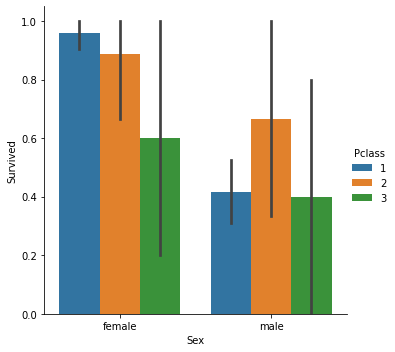

In [6]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train_df);

In [7]:
log_reg = LogisticRegression().fit(X, y)

#accuracy score
log_reg.score(X, y)

0.7049180327868853

In [15]:
log_reg.predict(test_df[['Pclass', 'Age', 'Fare']]) # the len is 87 == shape of df_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
test_case

array([  1,   5, 500])

In [19]:
log_reg.predict(test_case)[0] # the rich boy survived. 

1

In [10]:
log_reg.predict_proba(test_case)[0]

array([0.03314846, 0.96685154])

In [11]:
# What's the interpretation?
log_reg.coef_ #Pclass is negatively correlated so is Age, however, fare is positively correlated. 

array([[-0.35403711, -0.03973226,  0.00306877]])

In [12]:
log_reg.intercept_

array([2.39136004])